## Observations and Insights 

<ul>
    <li>Treatment with Capomulin is effective as the tumor volume decreases with timepoint.</li>
    <li>Among the top 4 treatment regimens, Ramicane has the lowest median for final tumor volume and the most effective drug. Capomulin which is Pymaceuticals' drug of interest comes next to Ramicane and has a slightly higher median for final tumor volume. </li>
    <li>Pearson’s correlation coefficient between mouse weight and average tumor volume is 0.84. Any value greater than 0.7 indicates a strong positive correlation between the 2 factors. Based on this we can conclude that the average tumor volume increases with weight.</li>

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# Study data files
mouse_metadata_path = os.path.join("data", "Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_data = merged_data.loc[merged_data.duplicated(["Mouse ID", "Timepoint"], keep = False)]
mouse_id = dup_mouse_data["Mouse ID"].unique()
print("Duplicate Mouse ID:" + mouse_id)

['Duplicate Mouse ID:g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop(merged_data.loc[merged_data["Mouse ID"] == "g989"].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
      
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = round(tumor_volume.mean(), 2)
median = round(tumor_volume.median(), 2)
variance = round(tumor_volume.var(), 2)
std = round(tumor_volume.std(), 2)
SEM = round(tumor_volume.sem(), 2)
summary_tmr_vol = pd.DataFrame({"Mean_Tumor_Volume": mean,
                                "Median_Tumor_Volume": median,
                                "Variance_Tumor_Volume": variance,
                                "STD_Tumor_Volume": std,
                                "SEM_Tumor_Volume": SEM})
summary_tmr_vol   

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,STD_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_tmr_vol_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean_Tumor_Volume = 'mean',
                                                                                   Median_Tumor_Volume = 'median',
                                                                                   Variance_Tumor_Volume = 'var',
                                                                                   STD_Tumor_Volume = 'std',
                                                                                   SEM_Tumor_Volume = 'sem')

# Print format
summary_tmr_vol_agg['Mean_Tumor_Volume'] = summary_tmr_vol_agg['Mean_Tumor_Volume'].map('${:,.2f}'.format)
summary_tmr_vol_agg['Median_Tumor_Volume'] = summary_tmr_vol_agg['Median_Tumor_Volume'].map('${:,.2f}'.format)
summary_tmr_vol_agg['Variance_Tumor_Volume'] = summary_tmr_vol_agg['Variance_Tumor_Volume'].map('${:,.2f}'.format)
summary_tmr_vol_agg['STD_Tumor_Volume'] = summary_tmr_vol_agg['STD_Tumor_Volume'].map('${:,.2f}'.format)
summary_tmr_vol_agg['SEM_Tumor_Volume'] = summary_tmr_vol_agg['SEM_Tumor_Volume'].map('${:,.2f}'.format)
summary_tmr_vol_agg

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,STD_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,$40.68,$41.56,$24.95,$4.99,$0.33
Ceftamin,$52.59,$51.78,$39.29,$6.27,$0.47
Infubinol,$52.88,$51.82,$43.13,$6.57,$0.49
Ketapril,$55.24,$53.70,$68.55,$8.28,$0.60
Naftisol,$54.33,$52.51,$66.17,$8.13,$0.60
Placebo,$54.03,$52.29,$61.17,$7.82,$0.58
Propriva,$52.32,$50.45,$43.85,$6.62,$0.54
Ramicane,$40.22,$40.67,$23.49,$4.85,$0.32
Stelasyn,$54.23,$52.43,$59.45,$7.71,$0.57


## Bar and Pie Charts

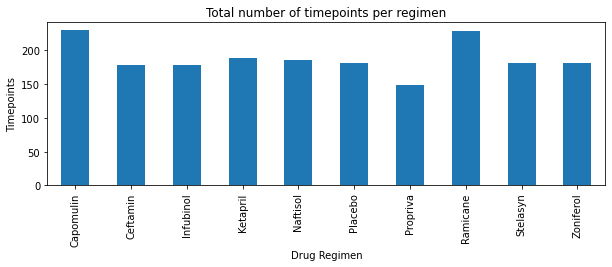

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_chart = clean_data.groupby("Drug Regimen")["Timepoint"].count().plot(kind="bar", figsize=(10,3), title="Total number of timepoints per regimen")
bar_chart.set_ylabel("Timepoints");

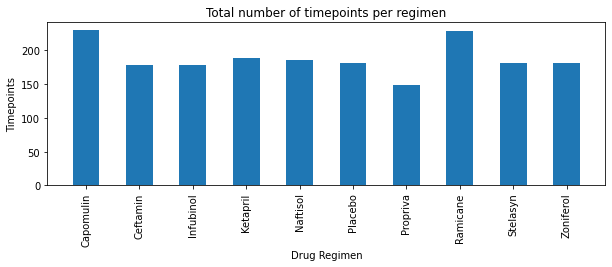

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_data.groupby("Drug Regimen")["Timepoint"].count().index.tolist()
y_axis = clean_data.groupby("Drug Regimen")["Timepoint"].count().tolist()

# Bar plot
plt.figure(figsize=(10,3))
plt.bar(x_axis,y_axis, width=.5)
plt.xticks(rotation='vertical');
plt.title("Total number of timepoints per regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints");

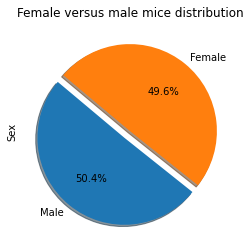

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data[["Mouse ID", "Sex"]].drop_duplicates("Mouse ID")
explode = (0.1, 0)
gender_data["Sex"].value_counts().plot(kind="pie", title="Female versus male mice distribution", 
                                       explode=explode, autopct="%1.1f%%", shadow=True, startangle=140);

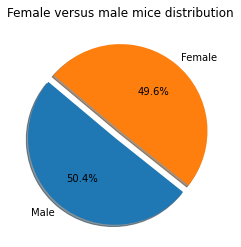

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_data["Sex"].value_counts().index.tolist()
sizes = gender_data["Sex"].value_counts().tolist()
plt.pie(sizes, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female versus male mice distribution");

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_data = clean_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_data = pd.merge(clean_data, tumor_data, how="right", on=["Mouse ID", "Timepoint"])

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tmr_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tmr_vol_list = final_tumor_data.loc[final_tumor_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    final_tmr_vol_list.append(tmr_vol_list)

    # add subset 
    quartiles = tmr_vol_list.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 2)
    upperq = round(quartiles[0.75], 2)
    iqr = round(upperq-lowerq, 2)
    
    print("IQR data for " + treatment + " treatment")
    print("===============================")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")

    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outlier = [round(tmr_vol, 2) for tmr_vol in tmr_vol_list if ((tmr_vol > upper_bound) or (tmr_vol < lower_bound))]
    if outlier:
        print(f"Outliers: {outlier}")
    else:
        print("No outliers in this treatment")
    print("\n")


IQR data for Capomulin treatment
The lower quartile is: 32.38
The upper quartile is: 40.16
The interquartile range is: 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
No outliers in this treatment


IQR data for Ramicane treatment
The lower quartile is: 31.56
The upper quartile is: 40.66
The interquartile range is: 9.1
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
No outliers in this treatment


IQR data for Infubinol treatment
The lower quartile is: 54.05
The upper quartile is: 65.53
The interquartile range is: 11.48
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
Outliers: [36.32]


IQR data for Ceftamin treatment
The lower quartile is: 48.72
The upper quartile is: 64.3
The interquartile range is: 15.58
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.
No outliers in this treatment




Text(0.5, 1.0, 'Final tumor volume of mice across top 4 regimens')

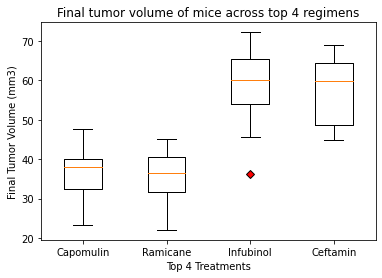

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(final_tmr_vol_list,flierprops=red_diamond)
plt.xticks([1,2,3,4],treatments);
plt.xlabel("Top 4 Treatments")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final tumor volume of mice across top 4 regimens")


## Line and Scatter Plots

(-0.5, 46.0)

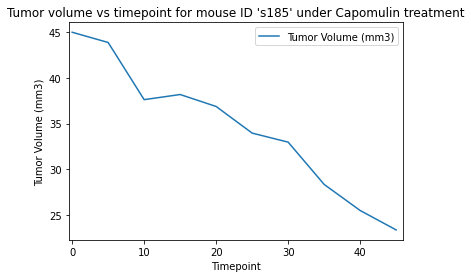

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = clean_data.loc[clean_data["Mouse ID"] == "s185", ["Timepoint", "Tumor Volume (mm3)"]]
mouse_capomulin.plot.line(x="Timepoint", y="Tumor Volume (mm3)")
plt.title("Tumor volume vs timepoint for mouse ID 's185' under Capomulin treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-.5,46)

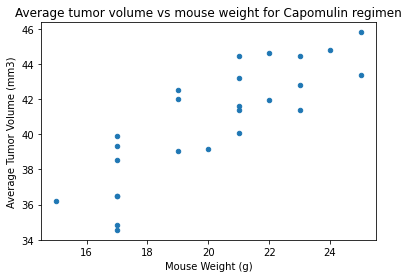

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grp_reg = clean_data.groupby(["Drug Regimen"]).get_group("Capomulin").groupby("Mouse ID").mean()
grp_reg.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")
plt.title("Average tumor volume vs mouse weight for Capomulin regimen");
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)");

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84


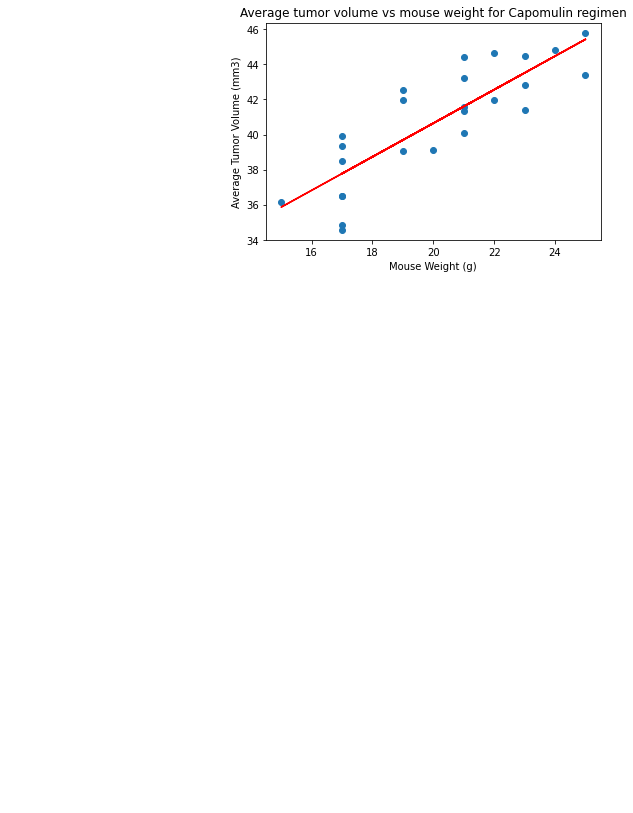

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_wt = grp_reg["Weight (g)"]
avg_tmr_vol = grp_reg["Tumor Volume (mm3)"]

# Finding correlation coefficient
correlation = st.pearsonr(mouse_wt,avg_tmr_vol)
print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}")

plt.scatter(mouse_wt,avg_tmr_vol)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average tumor volume vs mouse weight for Capomulin regimen");

# Finding linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_wt, avg_tmr_vol)
regress_values = mouse_wt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting regression line
plt.plot(mouse_wt,regress_values,"r-")
plt.annotate(line_eq,(6,2),fontsize=15,color="red");